In [1]:
## tools

from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [2]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv papers")
print(arxiv.name)

arxiv


In [3]:
arxiv.invoke("What is the latest research on quantum computing?")

'Published: 2023-05-23\nTitle: Fast and energy-efficient non-volatile III-V-on-silicon photonic phase shifter based on memristors\nAuthors: Zhuoran Fang, Bassem Tossoun, Antoine Descos, Di Liang, Xue Huang, Geza Kurczveil, Arka Majumdar, Raymond G. Beausoleil\nSummary: Silicon photonics has evolved from lab research to commercial products in the\npast decade as it plays an increasingly crucial role in data communication for\nnext-generation data centers and high performance computing1. Recently,\nprogr'

In [4]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [5]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API")

In [6]:
### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [7]:
tavily.invoke("Provide me the recent AI news?")

[{'title': 'Artificial Intelligence News - ScienceDaily',
  'url': 'https://www.sciencedaily.com/news/computers_math/artificial_intelligence/',
  'content': 'Artificial Intelligence News\n\nTop Headlines\n\nLatest Headlines\n\nEarlier Headlines\n\nTuesday, April 8, 2025\n\nThursday, April 3, 2025\n\nThursday, March 27, 2025\n\nWednesday, March 26, 2025\n\nTuesday, March 25, 2025\n\nWednesday, March 19, 2025\n\nTuesday, March 18, 2025\n\nMonday, March 17, 2025\n\nThursday, March 6, 2025\n\nWednesday, March 5, 2025\n\nTuesday, March 4, 2025\n\nWednesday, February 26, 2025\n\nTuesday, February 25, 2025\n\nFriday, February 21, 2025\n\nThursday, February 20, 2025 [...] Wednesday, February 19, 2025\n\nThursday, February 13, 2025\n\nMonday, February 10, 2025\n\nMonday, February 3, 2025\n\nWednesday, January 29, 2025\n\nTuesday, January 28, 2025\n\nMonday, January 27, 2025\n\nTuesday, January 21, 2025\n\nThursday, January 16, 2025\n\nWednesday, January 15, 2025\n\nTuesday, January 14, 2025\n\n

In [8]:
## combine all these tools in the list
tools=[arxiv, wiki, tavily]

In [9]:
## Initialize the LLM Model
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-qwq-32b")


In [10]:
llm.invoke("What is AI")

AIMessage(content='\n<think>\nOkay, the user is asking, "What is AI?" Let me start by breaking down the term first. AI stands for Artificial Intelligence. I should explain that it\'s a field of computer science. But wait, maybe I should also mention the broader definition. The user might be a beginner, so I need to make it simple.\n\nI should define AI as the development of computer systems that can perform tasks that usually require human intelligence. Examples like problem-solving, learning, and perception come to mind. Maybe list some common applications like speech recognition, image processing, and decision-making systems.\n\nNext, I should explain the types of AI. There\'s the distinction between narrow or weak AI and general or strong AI. Narrow AI is what we have now, like Siri or recommendation systems. General AI is still theoretical, where machines can handle any intellectual task a human can do. That\'s important because people might confuse the two without knowing.\n\nThen

In [11]:
llm_with_tools=llm.bind_tools(tools=tools)


In [12]:
## Execute this call
llm_with_tools.invoke("What is the recent news on AI?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_b2fa', 'function': {'arguments': '{"query": "What is the recent news on AI?"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 188, 'prompt_tokens': 356, 'total_tokens': 544, 'completion_time': 0.456593052, 'prompt_time': 0.022091319, 'queue_time': 0.249482113, 'total_time': 0.478684371}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_3796682456', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--8a0ab8be-b468-4e0c-9920-bde1562e0cc8-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'What is the recent news on AI?'}, 'id': 'call_b2fa', 'type': 'tool_call'}], usage_metadata={'input_tokens': 356, 'output_tokens': 188, 'total_tokens': 544})

In [13]:
## Execute this call
llm_with_tools.invoke("What is the latest research on quantum computing?")


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_0ns7', 'function': {'arguments': '{"query": "latest research on quantum computing"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 138, 'prompt_tokens': 357, 'total_tokens': 495, 'completion_time': 0.334647505, 'prompt_time': 0.020007276, 'queue_time': 0.247132565, 'total_time': 0.354654781}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--57c3d7b4-219d-4b47-858d-aa3dd044c821-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'latest research on quantum computing'}, 'id': 'call_0ns7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 357, 'output_tokens': 138, 'total_tokens': 495})

In [14]:
## Execute this call
llm_with_tools.invoke("What is machine learning?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_d092', 'function': {'arguments': '{"query": "Machine learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 365, 'prompt_tokens': 353, 'total_tokens': 718, 'completion_time': 0.82729369, 'prompt_time': 0.022160416, 'queue_time': 0.267687065, 'total_time': 0.849454106}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_a91d9c2cfb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--bcd4b9e3-553d-4fe9-b281-5db5f8ddeeef-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Machine learning'}, 'id': 'call_d092', 'type': 'tool_call'}], usage_metadata={'input_tokens': 353, 'output_tokens': 365, 'total_tokens': 718})

## Workflow 

In [15]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage ## Human message or AI message
from typing import Annotated  ## labelling
from langgraph.graph.message import add_messages  ## Reducers in Langgraph

In [16]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    

In [17]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

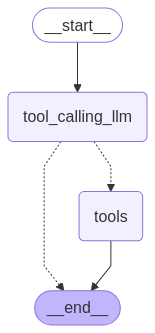

In [18]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [19]:
messages=graph.invoke({"messages":"1706.03762"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_gvqe)
 Call ID: call_gvqe
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [20]:
messages=graph.invoke({"messages":"Hi My name is Krish"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi My name is Krish
================================== Ai Message ==================================

Hello Krish! Nice to meet you. How can I assist you today?


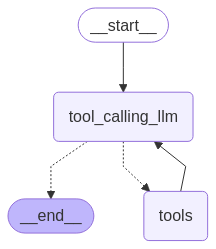

In [21]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "tool_calling_llm")

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [22]:
messages=graph.invoke({"messages":"What is the recent AI news and then please tell me the recent research paper on quantum computing?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent AI news and then please tell me the recent research paper on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_2cfj)
 Call ID: call_2cfj
  Args:
    query: recent AI news
  arxiv (call_25w6)
 Call ID: call_25w6
  Args:
    query: quantum computing recent
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "The latest AI news we announced in March - Google Blog", "url": "https://blog.google/technology/ai/google-ai-updates-march-2025/", "content": "The latest AI news we announced in March\n\nApr 04, 2025\n\n[[read-time]] min read\n\nHere’s a recap of some of our biggest AI updates from March, including Gemini 2.5 Pro, expanded access to AI Overviews, the release of AI Mode and more.\n\nGeneral summary [...] March was all